In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
data_path=('amazon_cells_labelled.txt')

In [80]:
comments_raw = pd.read_csv(data_path, delimiter= '\t', header=None)

In [81]:
comments_raw.columns = ['Comment', 'Rating']

## Feature Engineering
Here I choose keywords that are associated first with good reveiws, then adding negative words to attempt to remove false positives such as "not good, disappointed". In terms of further features, all caps are equally used for positives and negatives

In [82]:
keywords=['great','good','impressed','excellent','fine','recommend','exactly','wise','worthwhile','disappointed','waste','bad','breaking','defective','poor']

In [83]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    comments_raw[str(key)] = comments_raw.Comment.str.contains(
        (str(key)),
        case=False
    )

In [84]:
comments_raw

,Comment,Rating,great,good,impressed,excellent,fine,recommend,exactly,wise,worthwhile,disappointed,waste,bad,breaking,defective,poor
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9,What a waste of money and time!.,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


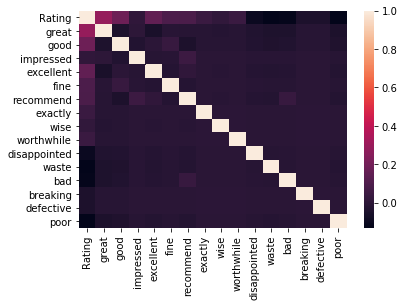

In [85]:
sns.heatmap(comments_raw.corr())

In [86]:
data = comments_raw[keywords]
target = comments_raw['Rating']

In [87]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 320


In [88]:
imdb_path=('imdb_labelled.txt')

In [89]:
imdb_comments_raw= pd.read_csv(imdb_path, delimiter= '\t', header=None)

In [91]:
imdb_comments_raw.columns=['comment','rating']

In [93]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    imdb_comments_raw[str(key)] = imdb_comments_raw.comment.str.contains(
        (str(key)),
        case=False
    )

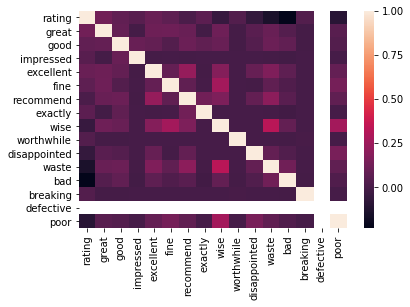

In [94]:
sns.heatmap(imdb_comments_raw.corr())

In [ ]:
data = imdb_comments_raw[keywords]
target = imdb_comments_raw['Rating']